# Implement Simple Naive bayes in Python Using Scikit-Learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score, classification_report
import pickle

### Importing Dataset and getting info

In [2]:
data = pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Displaying Covariance Matrix Heatmap

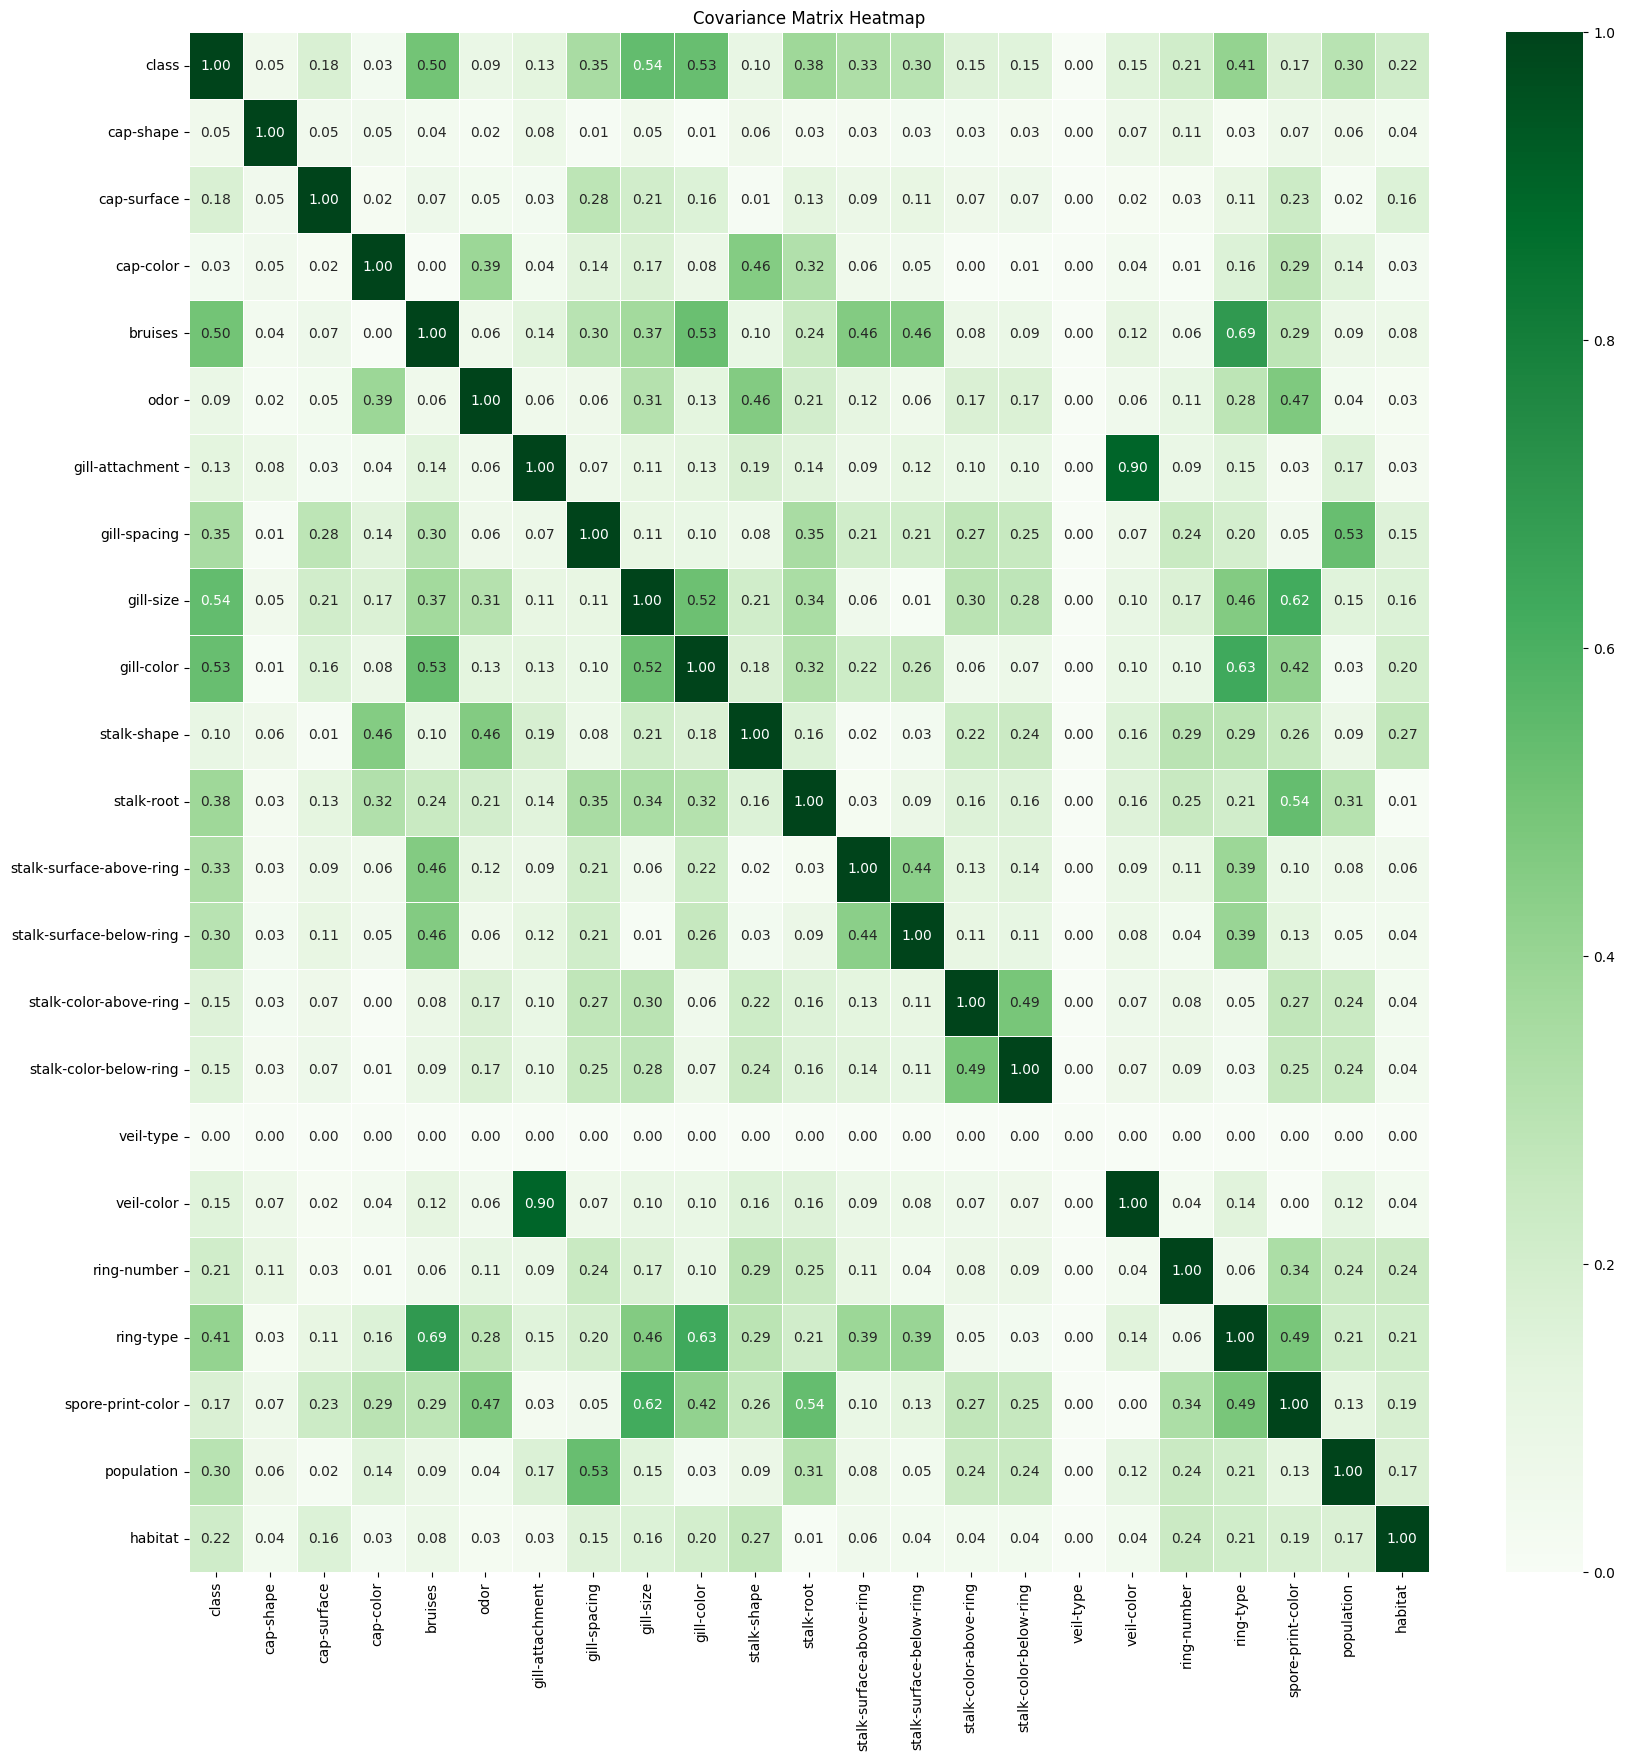

In [4]:
label_encoder = LabelEncoder()
scaler= StandardScaler()
df = data.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

### Dropping Unecessary Columns and spliting data into X and Y

In [5]:
df=df.drop(['veil-type' ], axis=1)
X = df.drop(['class'], axis=1)
Y = df['class']

### Scaling X Data

In [6]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Spliting into Train/Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Fitting the Naive bayes Model on Training Data and predicting

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

### Evaluating predictions

In [9]:
accuracy = accuracy_score(pred, y_test)
f1 = f1_score(pred, y_test, average='weighted')
print(f"Accuracy: {accuracy} | F1 Score: {f1}")

Accuracy: 0.9266371245691778 | F1 Score: 0.9266280516216282


In [10]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



### Saving Model & Scaler

In [11]:
filename = 'Bayes_Model.sav'
pickle.dump(model, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Loading Model

In [12]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9266371245691778
